## 教師あり学習(Supervised Learning)

* 分類(classification) 
* 二クラス分類(binary classification) ex:email that whether spam or not. There two class, or positive and negative.

*　多クラス分類(multiclass classification)                        

* 回帰（regression）

## 汎化・過剰適合・適合不足(generalize・overfitti・underfitting)

* 汎化：モデルが未知のデータに対して正確な予想ができることを指す
* 過剰適合：訓練データの要素が複雑すぎて未知のデータに対して意味をなさなくなってしまうこと（訓練データには適応できるがテストデータに対して対応できないこと）
* 適合不足：訓練データにすら対応出来ないほど単純なデータになっていること。

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mglearn
%matplotlib inline

## mglearn

* 人工データ（アルゴリズムの特定の側面を強調するように設計された）
* 実データ

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


X.shape: (26, 2)


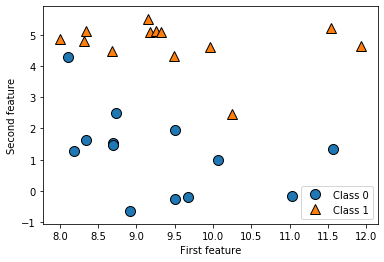

In [9]:
X, y = mglearn.datasets.make_forge()#forge:binary classification
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["Class 0", "Class 1"], loc = 4)
plt.xlabel("First feature")
plt.ylabel("Second feature")
print("X.shape: {}".format(X.shape))

Text(0, 0.5, 'Target')

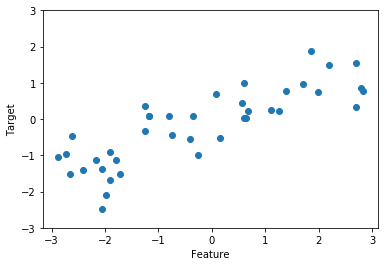

In [10]:
X, y = mglearn.datasets.make_wave(n_samples=40)#wave:regression
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("Feature")
plt.ylabel("Target")

In [11]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.key:\n{}".format(cancer.keys()))

cancer.key:
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [12]:
print("Shape of cancer data:{}".format(cancer.data.shape))

Shape of cancer data:(569, 30)


In [14]:
print("Summation per class:\n{}".format({n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))
#bincount: count mode

Summation per class:
{'malignant': 212, 'benign': 357}


In [15]:
print("Feature names:\n{}".format(cancer.feature_names))

Feature names:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [16]:
from sklearn.datasets import load_boston
boston = load_boston()
print("Data shape:{}".format(boston.data.shape))

Data shape:(506, 13)


In [17]:
X, y = mglearn.datasets.load_extended_boston()
print("X.shape:{}".format(X.shape))

X.shape:(506, 104)


## k-最近傍法

* 訓練データセットの中から最も近い点（最近傍点）を見つける
* それぞれのクラスに対して近傍点がいくつあるか数えて、最も多いクラスを予測値とする

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


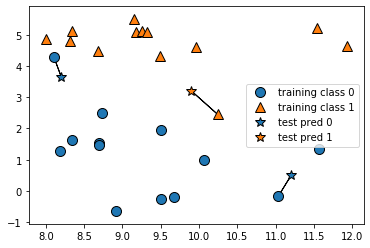

In [18]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


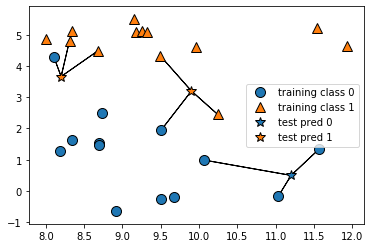

In [19]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [22]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


In [23]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier()

In [24]:
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [25]:
print("Test set predictions:{}".format(clf.predict(X_test)))

Test set predictions:[1 0 1 0 1 0 0]


In [26]:
print("Test set accuracy:{:.2f}".format(clf.score(X_test, y_test)))

Test set accuracy:0.86


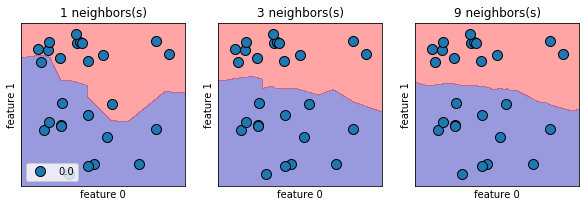

In [32]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X,y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], ax=ax)
    ax.set_title("{} neighbors(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=3)